In [2]:
import os
import numpy as np
import pandas as pd
import tifffile
from tqdm.notebook import  tqdm,trange
#from preprocessing import preprocessing_v2 as pp
DATA_PATH = r'C:\Users\amityu\Gel_Drop_Data'
movie = 'eye_gel'
MOVIE_PATH = os.path.join(DATA_PATH, movie)
import matplotlib.pyplot as plt

In [13]:
files = sorted(os.listdir(os.path.join(MOVIE_PATH, 'tif')))
gel_list = []
for file in tqdm(files):
    if file.endswith('.tif'):
        img = tifffile.imread(os.path.join(MOVIE_PATH, 'tif', file))
        img = np.pad(img, pad_width=max(img.shape)//2, mode='constant', constant_values=0)
        gel_list.append(img)

gel = np.array(gel_list)

  0%|          | 0/972 [00:00<?, ?it/s]

In [14]:
gel = np.expand_dims(gel, axis=1)
gel = gel.astype(np.float32)
gel.shape

(972, 1, 1024, 1024)

In [15]:
mask = (0,1,0,gel.shape[2], 0,gel.shape[3])
gel_transformed = pp.step_stabilize(gel.astype(np.float32), MOVIE_PATH, r'C:\Users\amityu\DataspellProjects\gel_sheets\add_data\eye_gel\transform\\', mask, mask)


2024-06-23 21:04:43


0it [00:00, ?it/s]

In [21]:
mask = (0,1,0,gel.shape[2], 0,gel.shape[3])
gel_transformed = pp.stabilize(gel.astype(np.float32), MOVIE_PATH, r'C:\Users\amityu\DataspellProjects\gel_sheets\add_data\eye_gel\transform\\', mask, mask, fixed_image_index=560)


2024-06-23 21:28:03


  0%|          | 0/972 [00:00<?, ?it/s]

In [22]:
gel_transformed = pp.apply_transform(gel,'C:/Users/amityu/DataspellProjects/gel_sheets/',movie)

  0%|          | 0/972 [00:00<?, ?it/s]

In [24]:
gel_transformed = np.squeeze(gel_transformed)
np.save(MOVIE_PATH + '/np/gel_transformed.npy', gel_transformed)

In [27]:
for t,img in enumerate(gel_transformed):
    tifffile.imwrite(MOVIE_PATH + '/tmp2/{}.tif'.format(t), img)

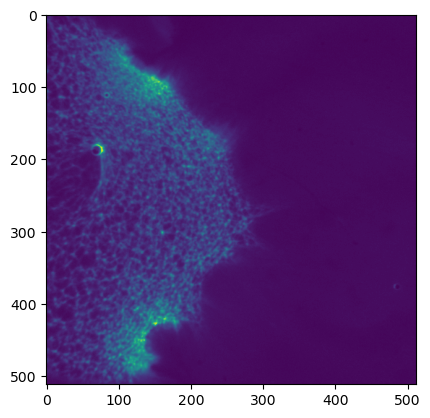

In [74]:
from tifffile import imread
image = imread(os.path.join(MOVIE_PATH, 'tif/20120913 exp3 x2_5 stream00972.tif'))
plt.imshow(image)
plt.show()

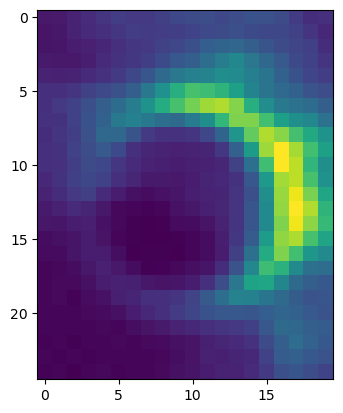

In [75]:
template = image[175:200, 60:80].copy()
plt.imshow(template)
plt.show()

In [76]:
from PIL import Image
tifffile.imwrite(os.path.join(DATA_PATH, 'tmp/image.tif'), image)
tifffile.imwrite(os.path.join(DATA_PATH, 'tmp/template.tif'), template)
pil_image = Image.fromarray(image)
pil_image.save(os.path.join(DATA_PATH, 'tmp/image.png'))
pil_template = Image.fromarray(template)
pil_template.save(os.path.join(DATA_PATH, 'tmp/template.png'))

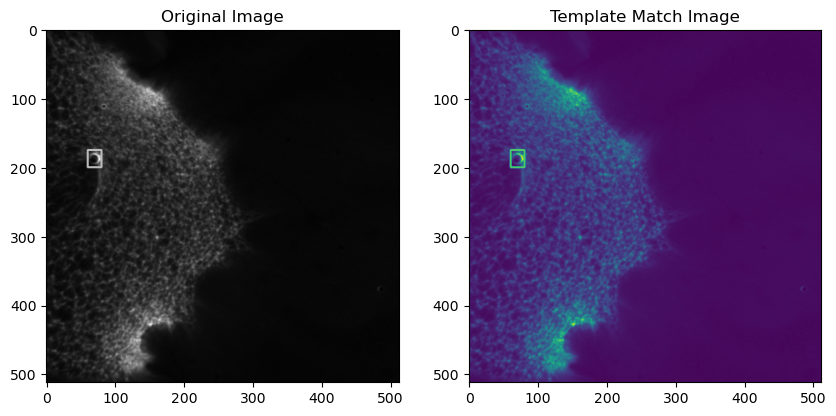

In [84]:
import cv2
# Load the template image
template_path = os.path.join(DATA_PATH, 'tmp/template.png')  # Provide the path to your template image
template = cv2.imread(template_path,cv2.IMREAD_ANYDEPTH)# cv2.IMREAD_GRAYSCALE)


def track_pattern_YA(_img, _template):
    assert _img.dtype ==np.uint16, "_img is not uint16" 
    assert _template.dtype ==np.uint16, "_template is not uint16" 

    # Convert to float32
    template_float32 = np.float32(_template)/65535
    # Perform template matching
    _image = (_img/2**16).astype(np.float32)
    result = cv2.matchTemplate(_image, template_float32, cv2.TM_CCOEFF_NORMED)
    
    # Find the location of the best match
    template_position = cv2.minMaxLoc(result)
    (min_val, max_val, min_loc, max_loc) = template_position 
    # Draw a rectangle around the matched region
    h, w = template_float32.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    #match_image = cv2.cvtColor(_image, cv2.COLOR_GRAY2BGR) 
    match_image = _image
    
    cv2.rectangle(match_image, top_left, bottom_right, 0.02, 2)
    return _image, match_image, template_position
_image, match_image,_ = track_pattern_YA(image, template)
# Display the original and matched images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Template Match Image")
plt.imshow(match_image)
plt.show()


In [107]:
files = sorted(os.listdir(os.path.join(MOVIE_PATH, 'tif')))
match_list = []
location_list = []
i_list = []
for i,file in tqdm(enumerate(files)):
    if file.endswith('.tif'):
        img = tifffile.imread(os.path.join(MOVIE_PATH, 'tif', file))
        _, match, mml = track_pattern_YA(img, template)
        print (i,mml[3])
        match_list.append(match)
        location_list.append(mml[3])
        i_list.append(i)
match = np.array(match_list)

0it [00:00, ?it/s]

0 (313, 369)
1 (60, 175)
2 (60, 175)
3 (60, 175)
4 (60, 175)
5 (60, 175)
6 (60, 175)
7 (309, 368)
8 (60, 175)
9 (60, 175)
10 (60, 175)
11 (60, 175)
12 (60, 175)
13 (60, 175)
14 (60, 175)
15 (60, 175)
16 (60, 175)
17 (60, 175)
18 (60, 175)
19 (60, 175)
20 (60, 175)
21 (60, 175)
22 (60, 175)
23 (140, 234)
24 (60, 175)
25 (60, 175)
26 (60, 175)
27 (60, 175)
28 (60, 175)
29 (60, 175)
30 (60, 175)
31 (60, 175)
32 (60, 175)
33 (60, 175)
34 (60, 175)
35 (137, 235)
36 (60, 175)
37 (60, 175)
38 (136, 235)
39 (60, 175)
40 (136, 235)
41 (135, 235)
42 (60, 175)
43 (60, 175)
44 (60, 175)
45 (60, 175)
46 (60, 175)
47 (60, 175)
48 (60, 175)
49 (60, 175)
50 (60, 175)
51 (60, 175)
52 (60, 175)
53 (60, 175)
54 (60, 175)
55 (60, 175)
56 (60, 175)
57 (60, 175)
58 (60, 175)
59 (60, 175)
60 (60, 175)
61 (60, 175)
62 (60, 175)
63 (60, 175)
64 (60, 175)
65 (60, 175)
66 (60, 175)
67 (60, 175)
68 (60, 175)
69 (60, 175)
70 (60, 175)
71 (60, 175)
72 (60, 175)
73 (60, 175)
74 (60, 175)
75 (60, 175)
76 (60, 175)
77

In [109]:
import pandas as pd
loc_df= pd.DataFrame({'FRAME':i_list, 'x': [x for (y,x) in location_list], 'y':[y for (y,x) in location_list]})
loc_df.to_csv(os.path.join(MOVIE_PATH ,'np/loc.csv'))

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


# Assuming 'data' is your 3D numpy array of shape (t, y, x)
def browse_images(data):
    n = data.shape[0]

    def view_image(i=0):
        plt.imshow(data[i, :, :], cmap='gray', interpolation='nearest')
        plt.show()

    interact(view_image, i=(0, n - 1))


browse_images(match)

interactive(children=(IntSlider(value=0, description='i', max=971), Output()), _dom_classes=('widget-interact'…

In [98]:
import importlib
importlib.reload(gu)

<module 'utils.graph_utils' from 'C:\\Users\\amityu\\DataspellProjects\\gel_sheets\\utils\\graph_utils.py'>

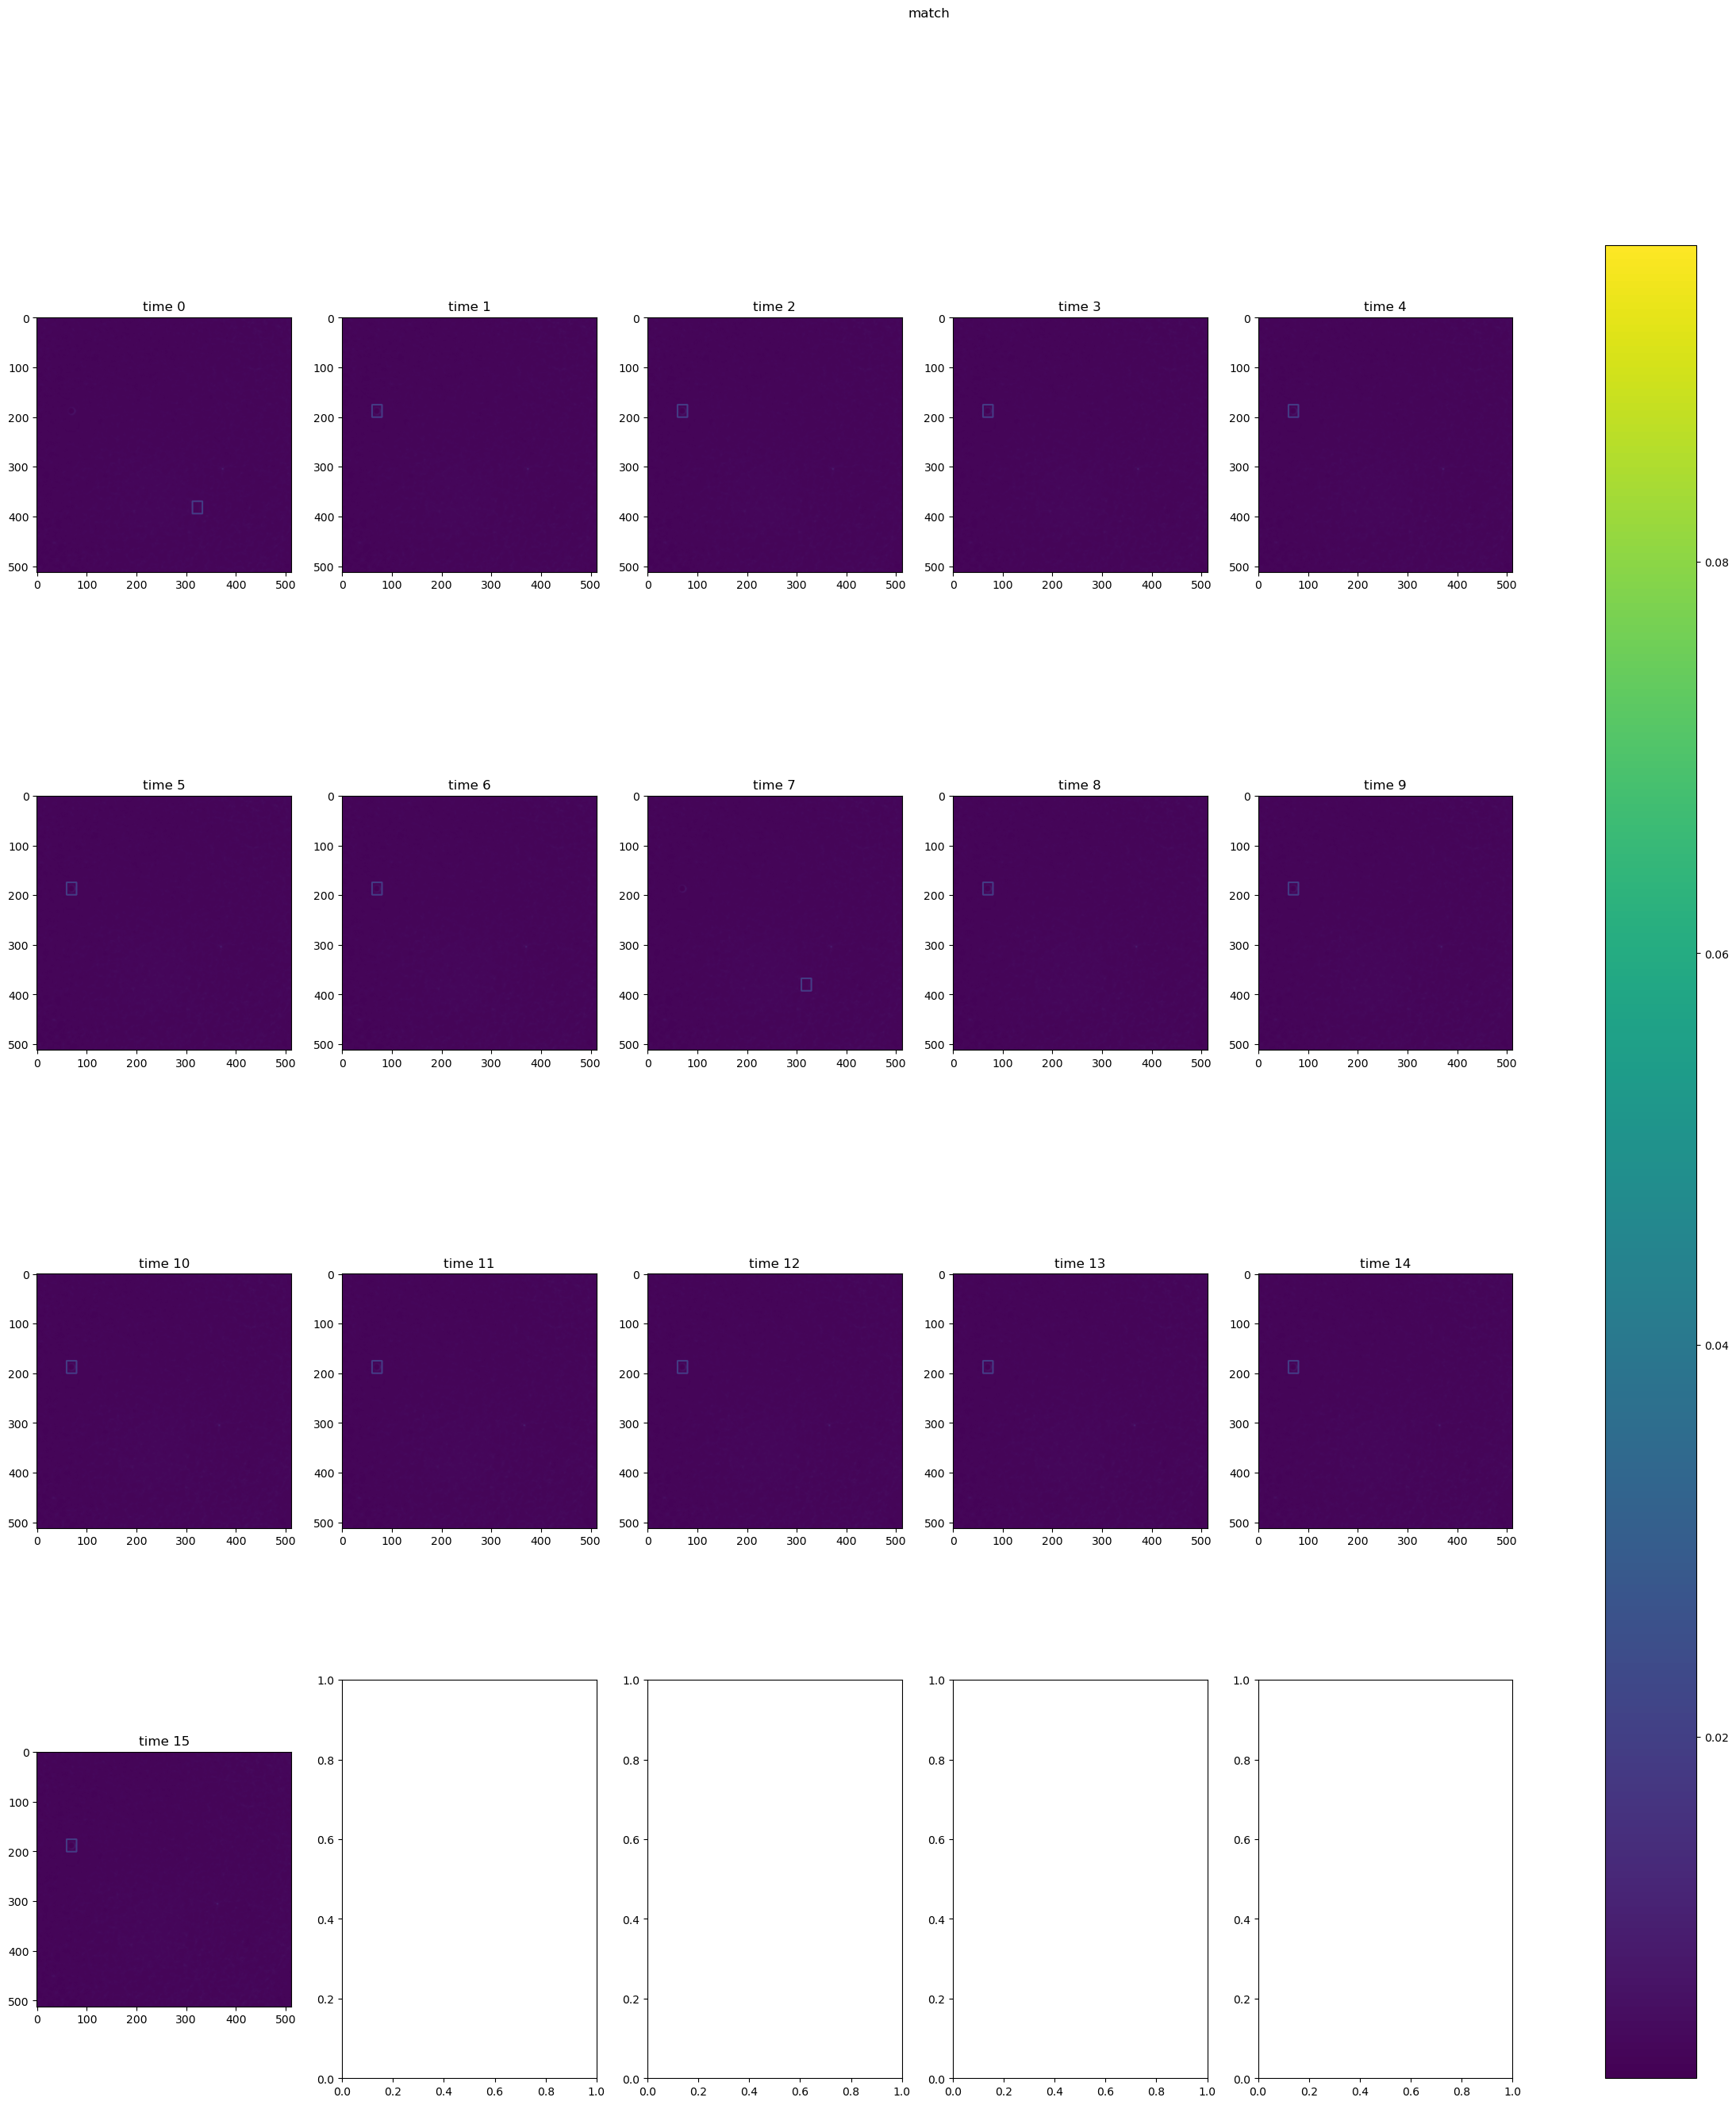

In [111]:
from utils import graph_utils as gu
gu.show_imshow_sequence_with_colorbar(match,np.arange(16), 'match')

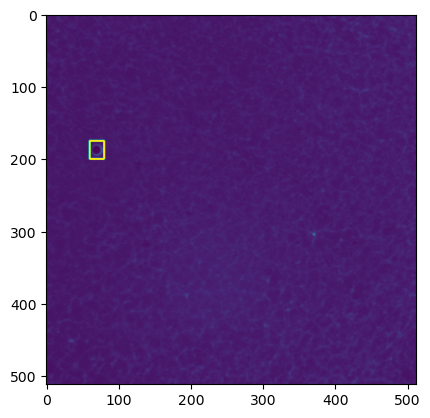

In [97]:
plt.imshow(match[5])

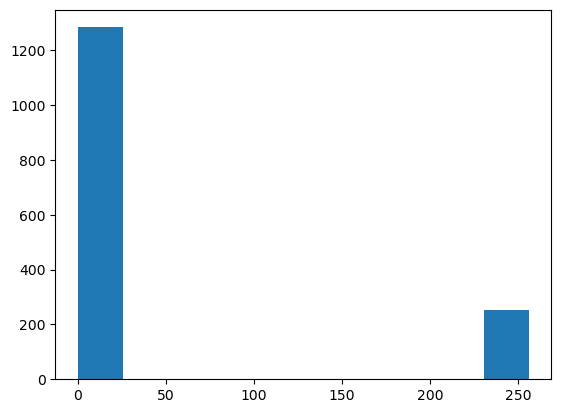

In [46]:
plt.hist(match_image[2].flatten())
plt.show()

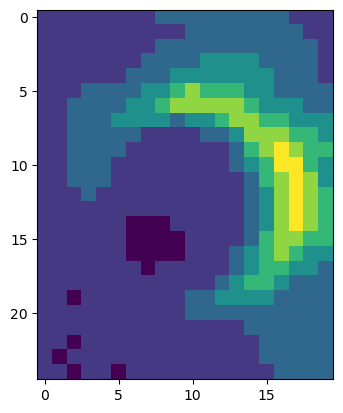

In [17]:
plt.imshow(template)

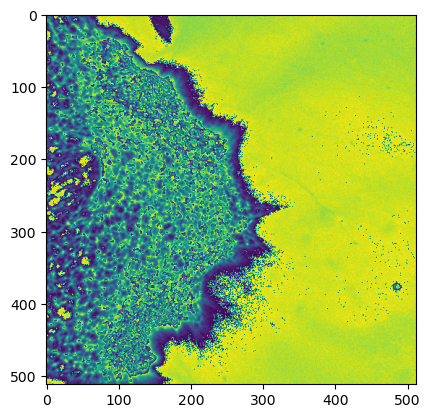

In [18]:
plt.imshow(image8)